In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import keras

from aico.simulation import sim_demo_model
from aico.score import neg_squared_loss
from aico.test import first_order_test, check_second_order, second_order_test

# First-order test
## Plot

In [2]:
all_first_order_results = []
for seed in range(100, 1001, 100):
    n_train, n_test = 1000000, 500000
    x_train, x_test, y_train, y_test = sim_demo_model(n_train, n_test, seed=seed)

    model = keras.saving.load_model(f'Models/seed_{seed}.h5')
    intercept = np.mean(x_train, axis=0)

    first_order_results = first_order_test(x=x_test,
                                           y=y_test,
                                           model=model,
                                           score_func=neg_squared_loss,
                                           intercept=intercept,
                                           alpha=0.05,
                                           seed=seed,
                                           visualize=True,
                                           pred_params=dict(batch_size=n_test,
                                                            verbose=0))
    all_first_order_results.append(first_order_results)

all_first_order_results = pd.concat(all_first_order_results)

UnboundLocalError: cannot access local variable 'p' where it is not associated with a value

## Table

In [3]:
print(all_first_order_results)

    seed   k        score_func  sample_size     median  p_sign_test  alpha  \
0    100   0  neg_squared_loss       500000   0.000000     1.000000   0.05   
1    100   1  neg_squared_loss       500000  18.870908     0.000000   0.05   
2    100   2  neg_squared_loss       500000  -0.000452     1.000000   0.05   
3    100   3  neg_squared_loss       500000   0.403987     0.000000   0.05   
4    100   4  neg_squared_loss       500000  -0.000574     1.000000   0.05   
..   ...  ..               ...          ...        ...          ...    ...   
15  1000  15  neg_squared_loss       500000  -0.000009     0.788683   0.05   
16  1000  16  neg_squared_loss       500000  -0.000036     0.880610   0.05   
17  1000  17  neg_squared_loss       500000  -0.000098     0.971606   0.05   
18  1000  18  neg_squared_loss       500000   0.000010     0.408845   0.05   
19  1000  19  neg_squared_loss       500000   0.000002     0.458887   0.05   

        lower      upper  
0    0.000000   0.000000  
1   18.65

# Second-order test
## Plot

In [3]:
check_second_order(x_test,
                   y_test,
                   model=model,
                   score_func=neg_squared_loss,
                   intercept=intercept,
                   first_order_result=first_order_results,
                   alpha=0.05,
                   seed=seed,
                   visualize=True,
                   pred_params=dict(batch_size=n_test,
                                                             verbose=0))

NameError: name 'first_order_results' is not defined

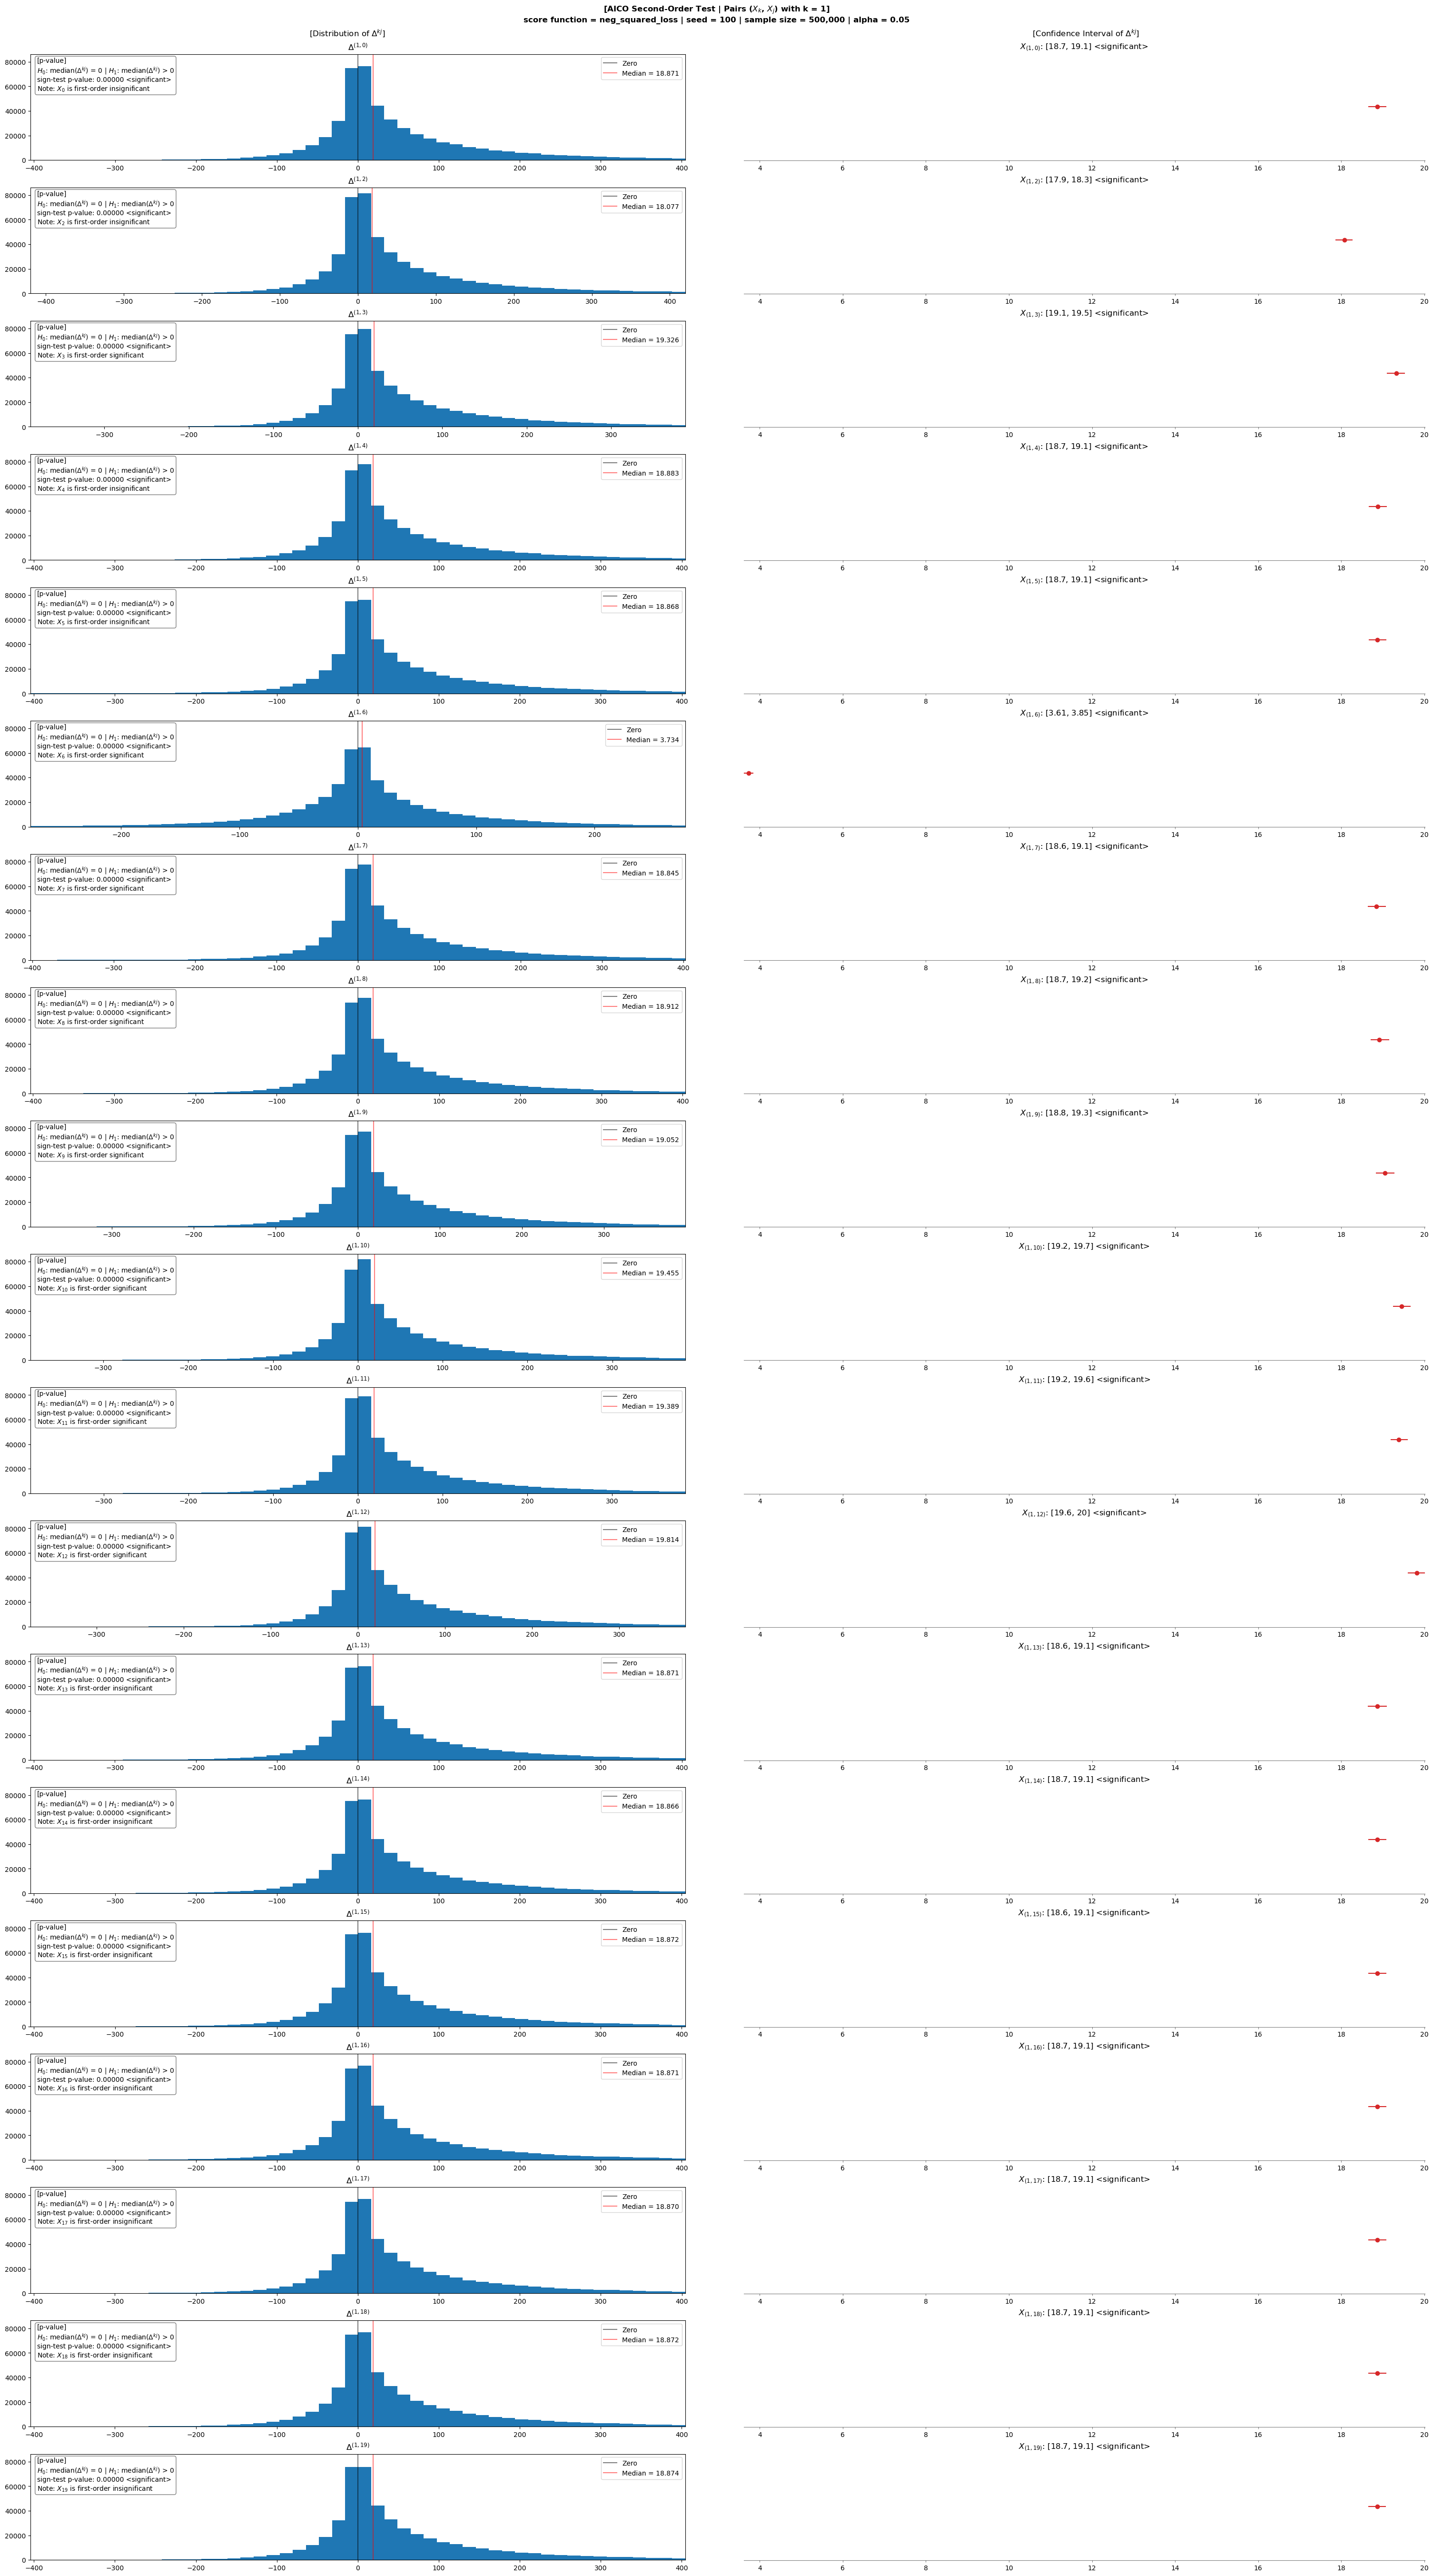

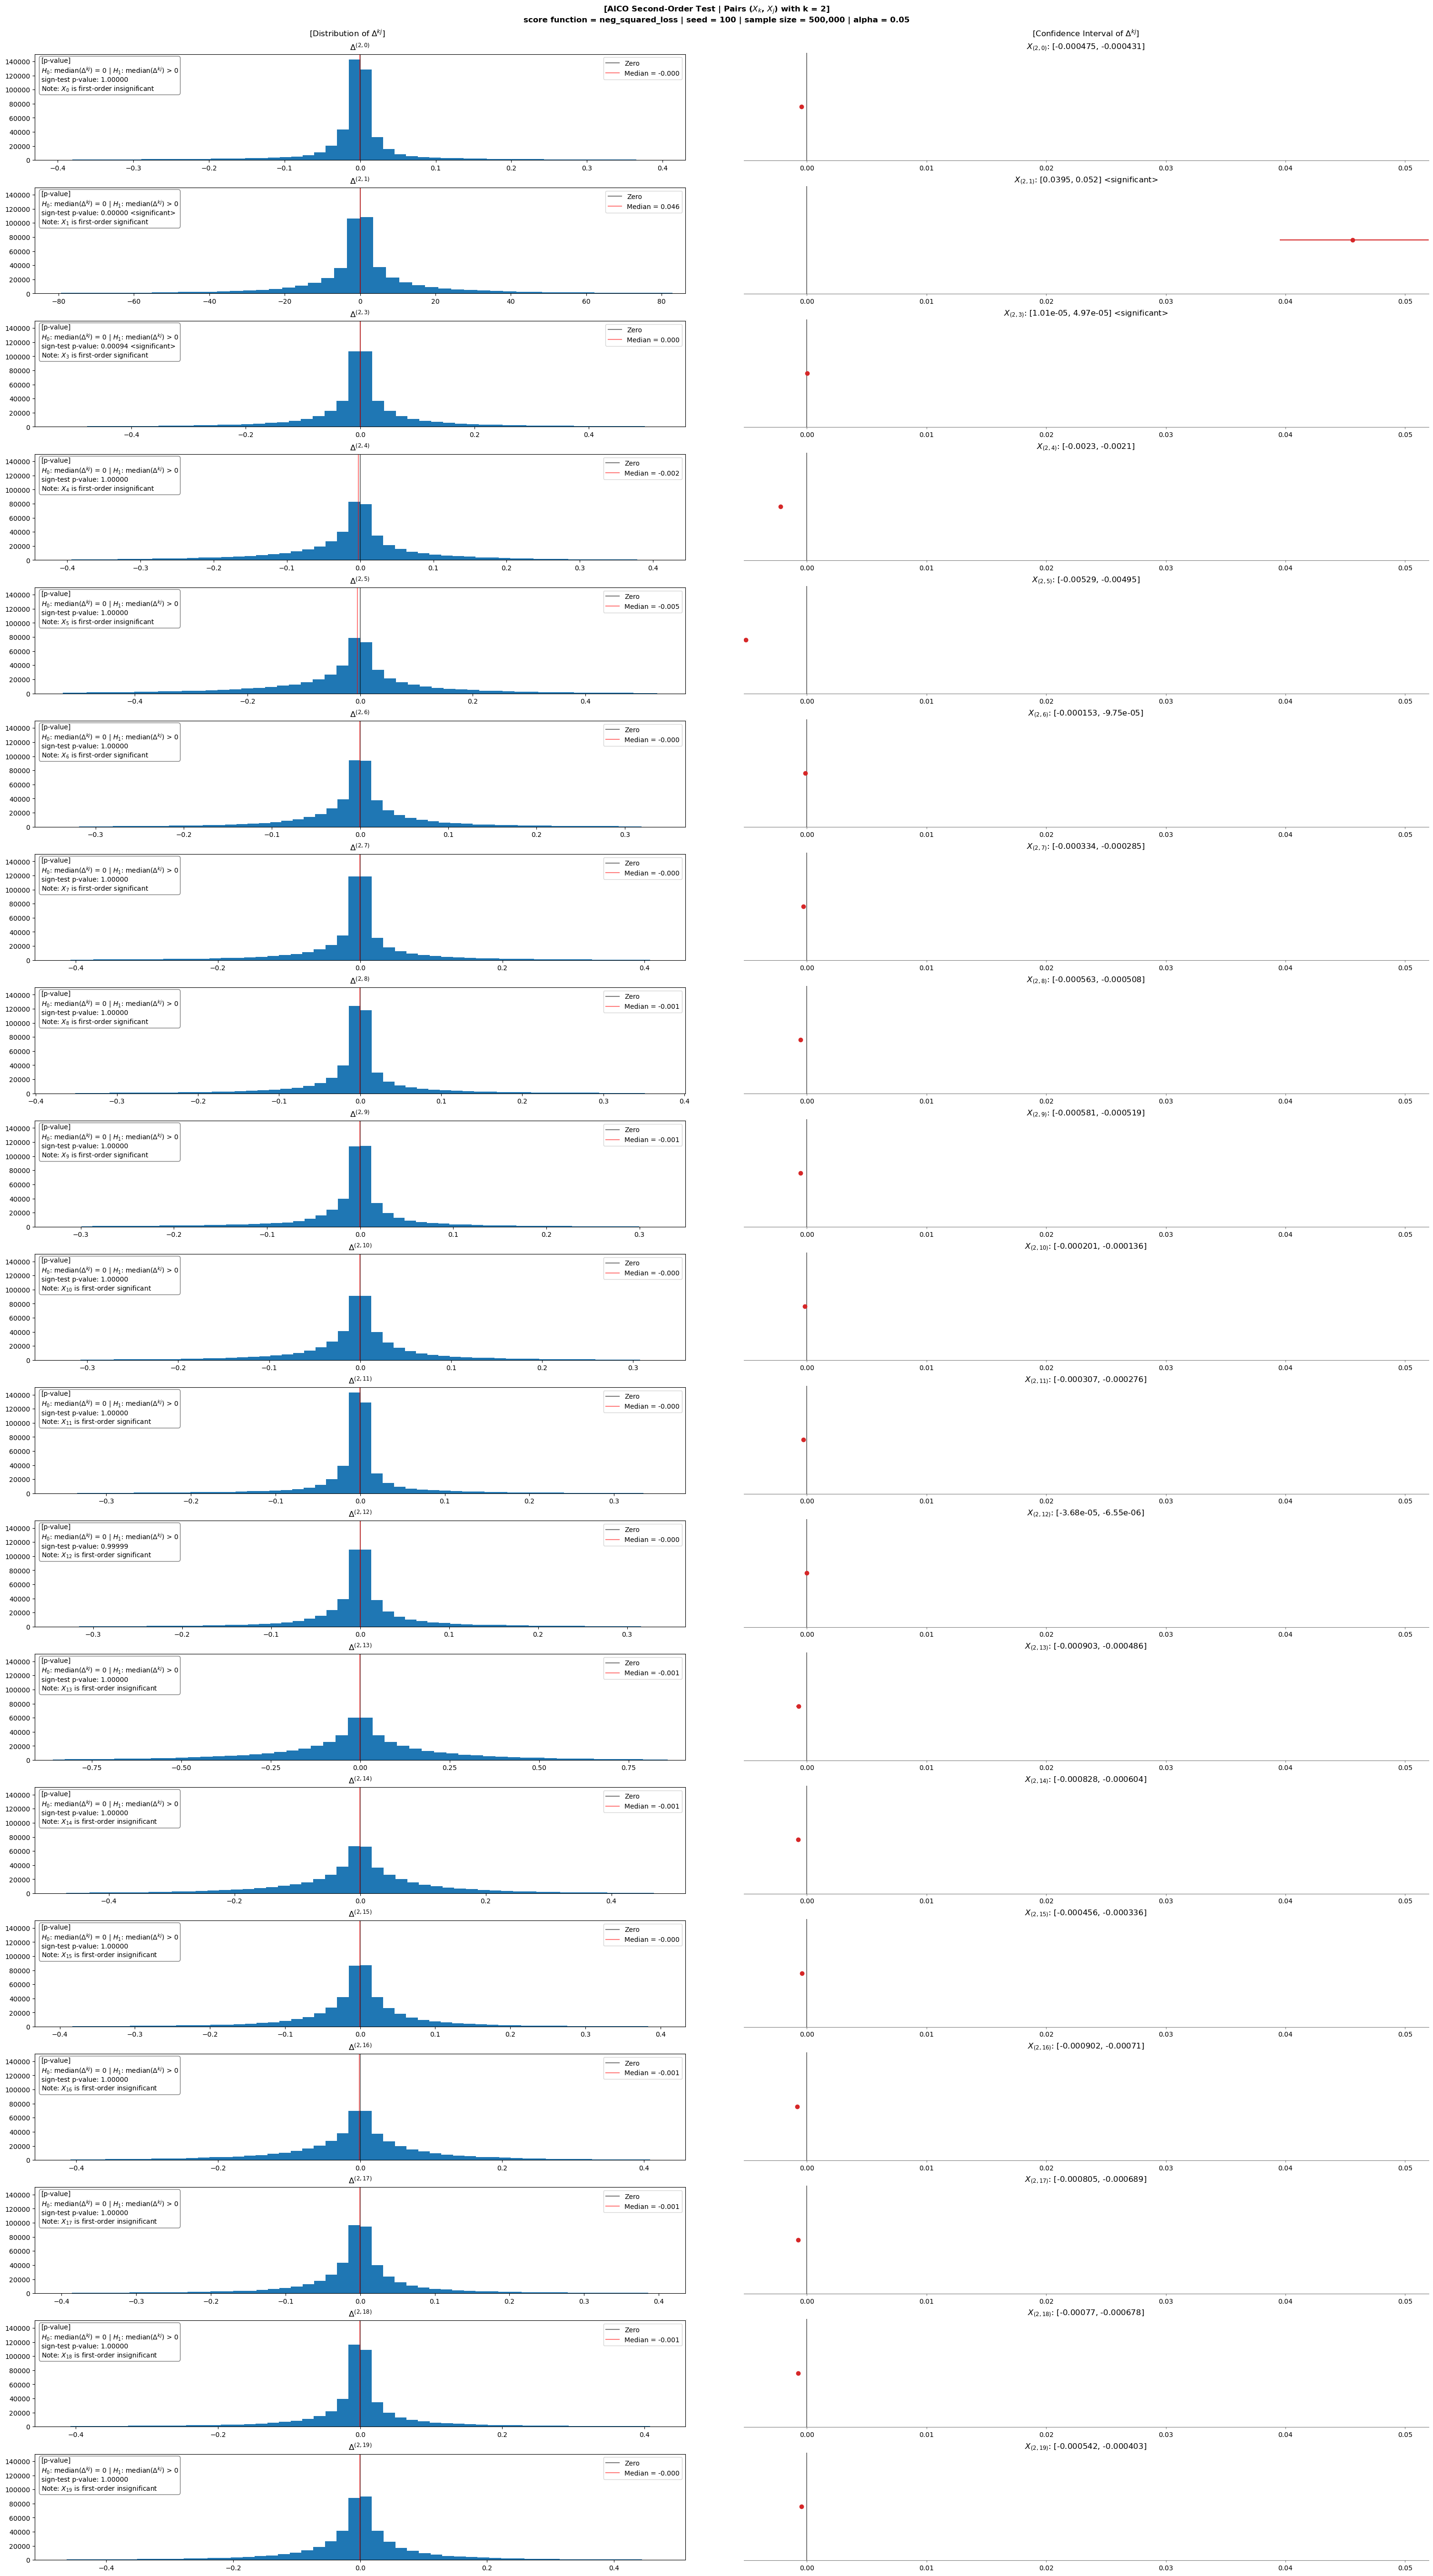

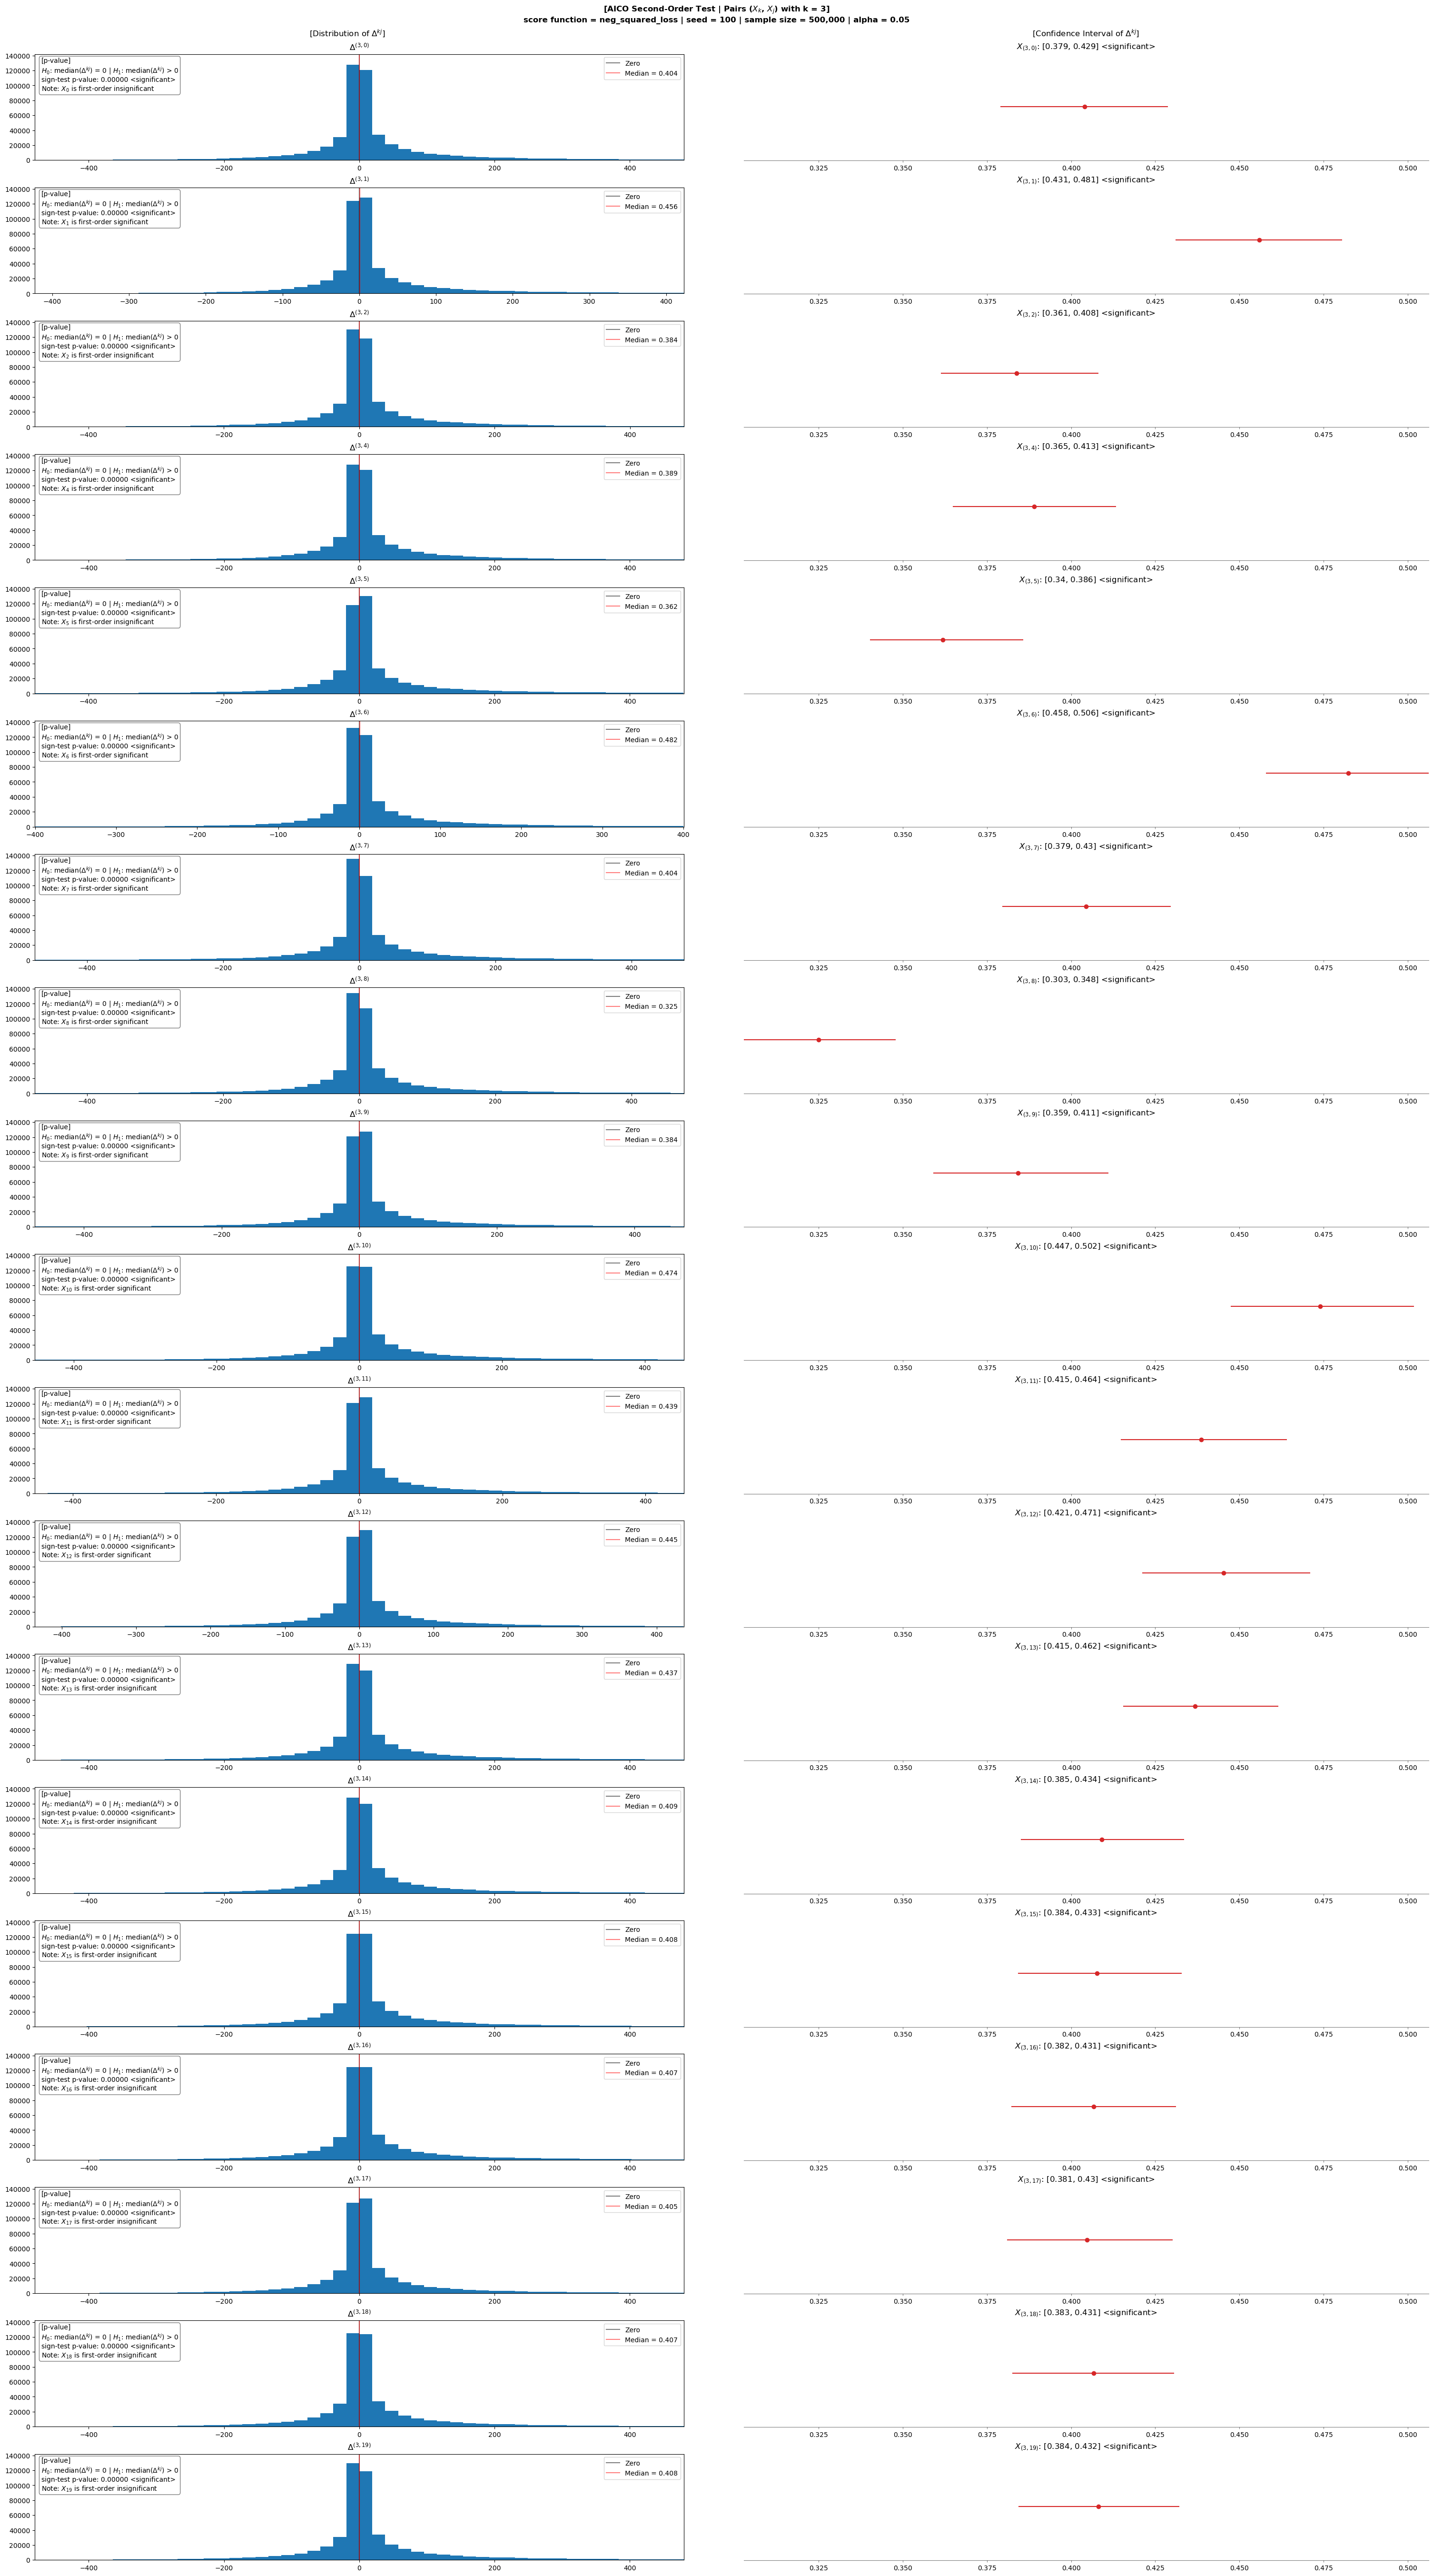

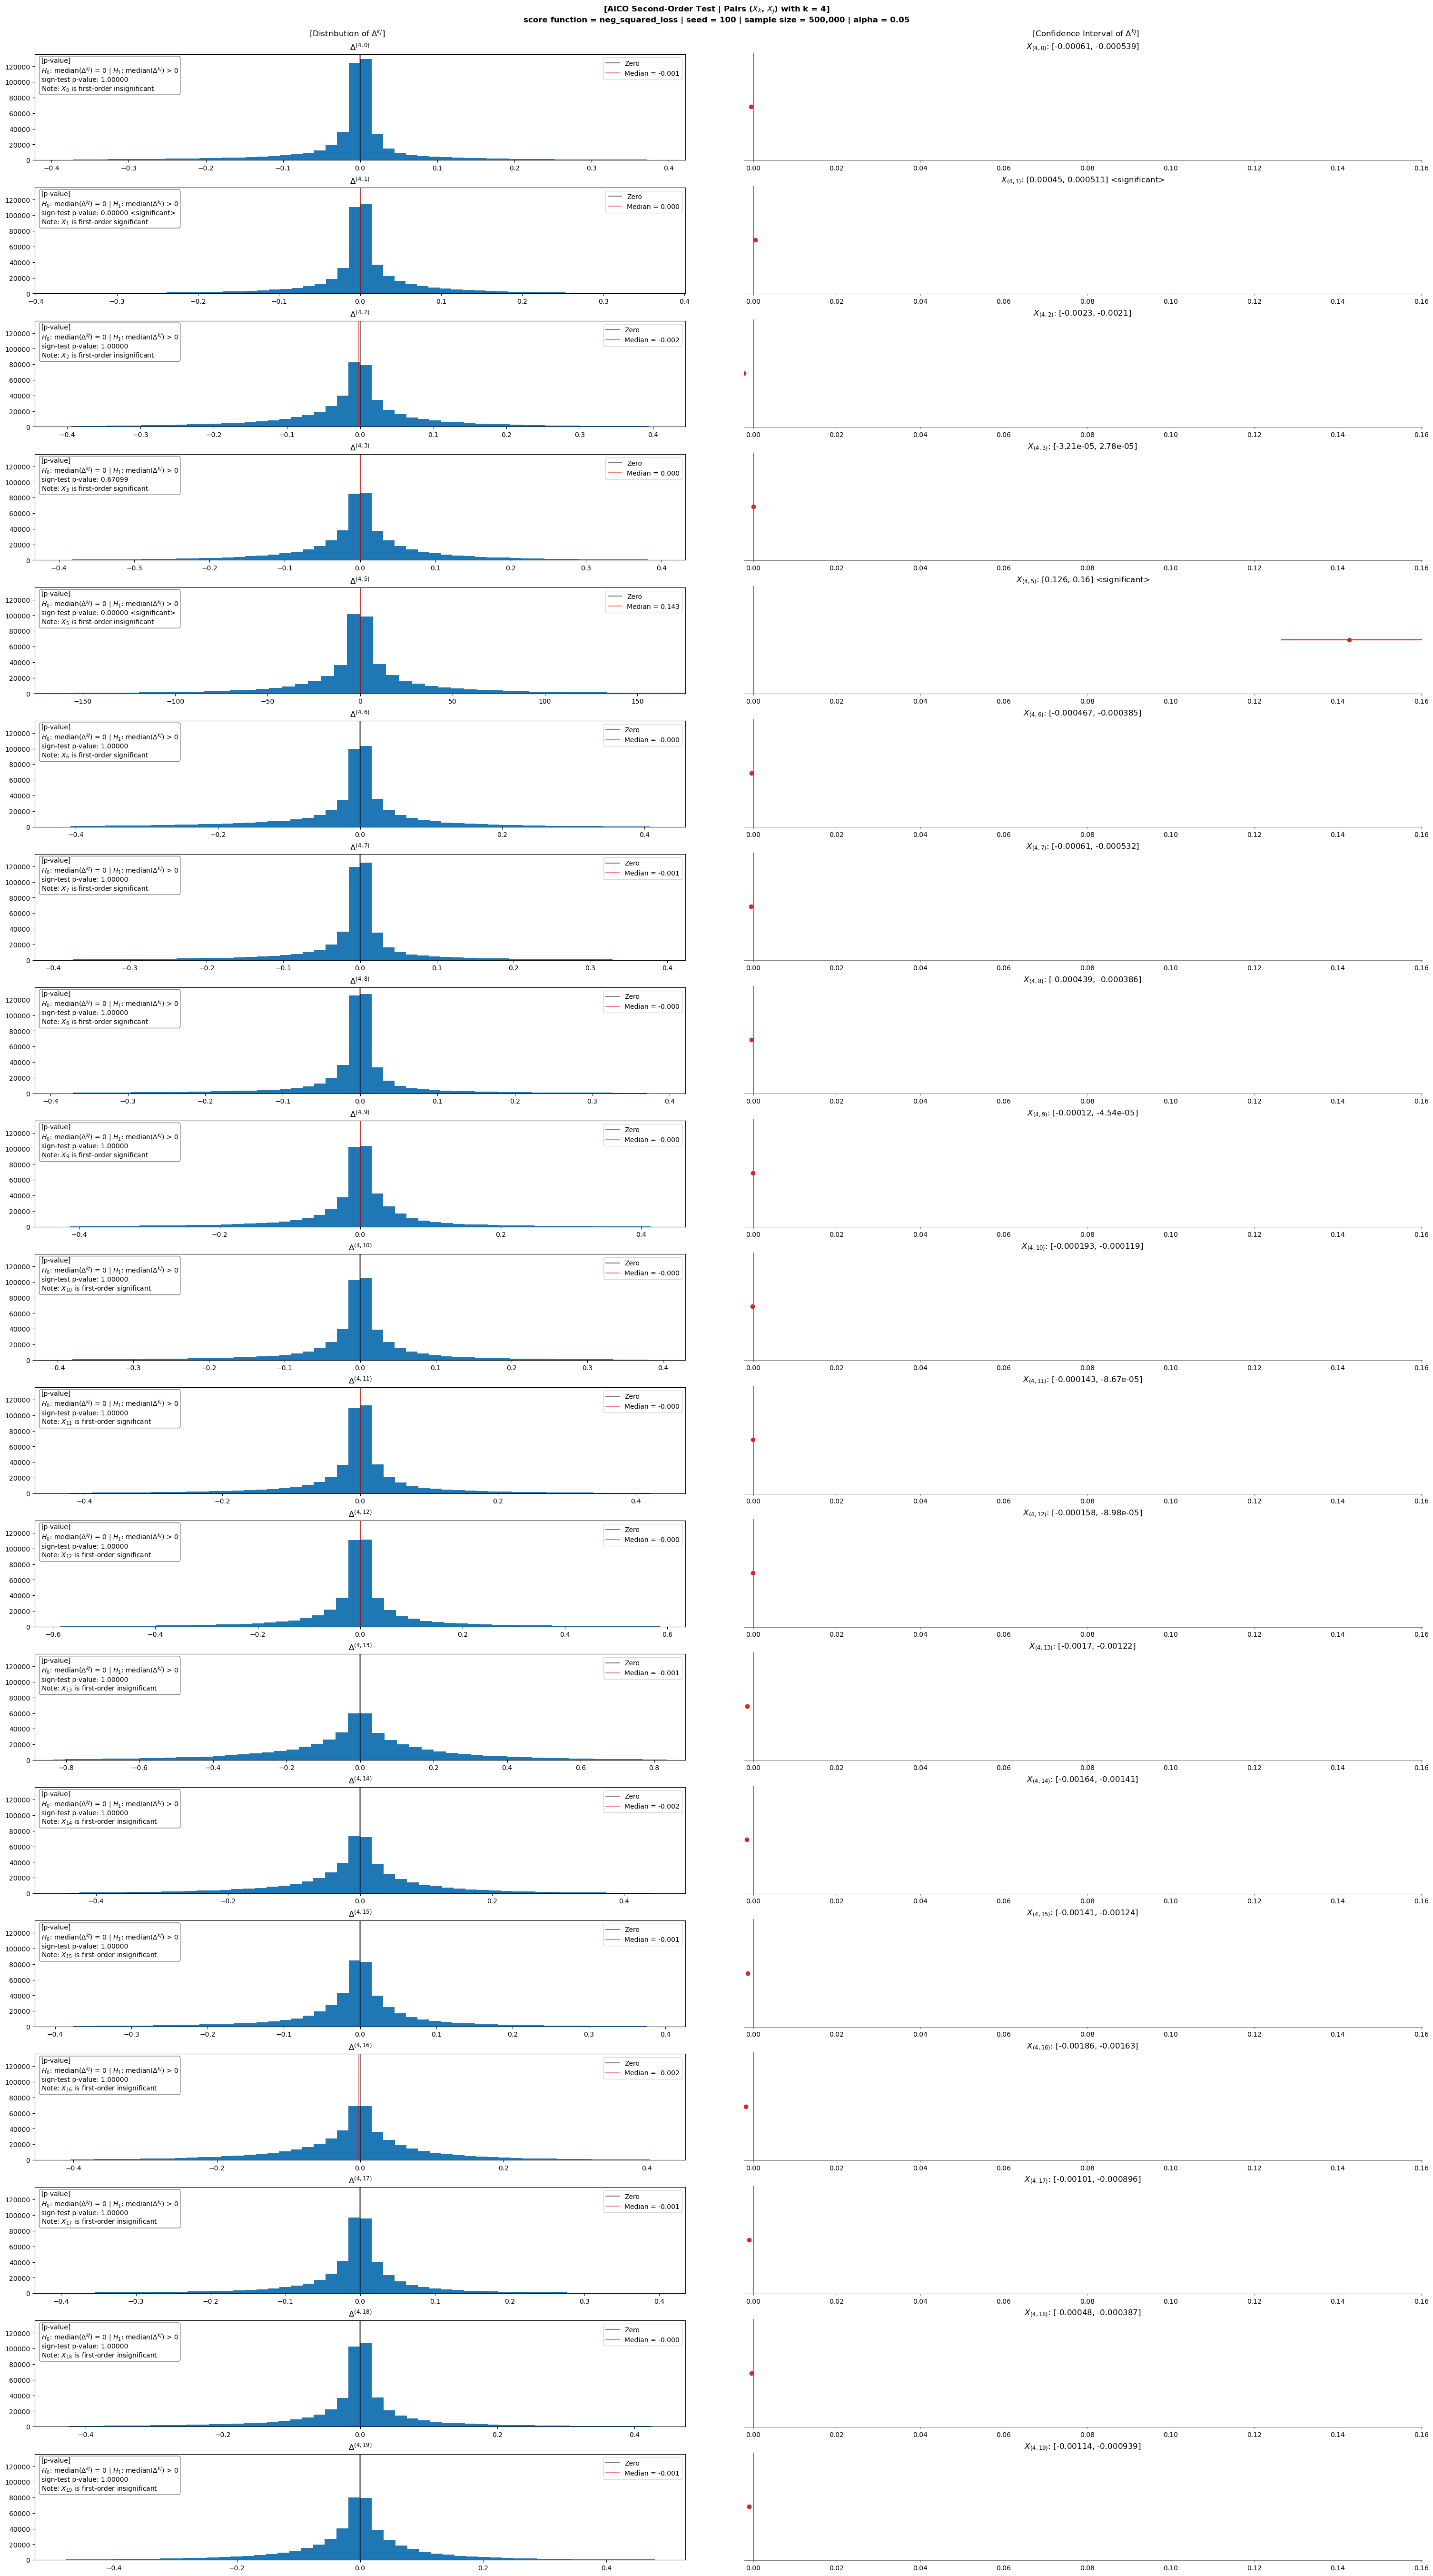

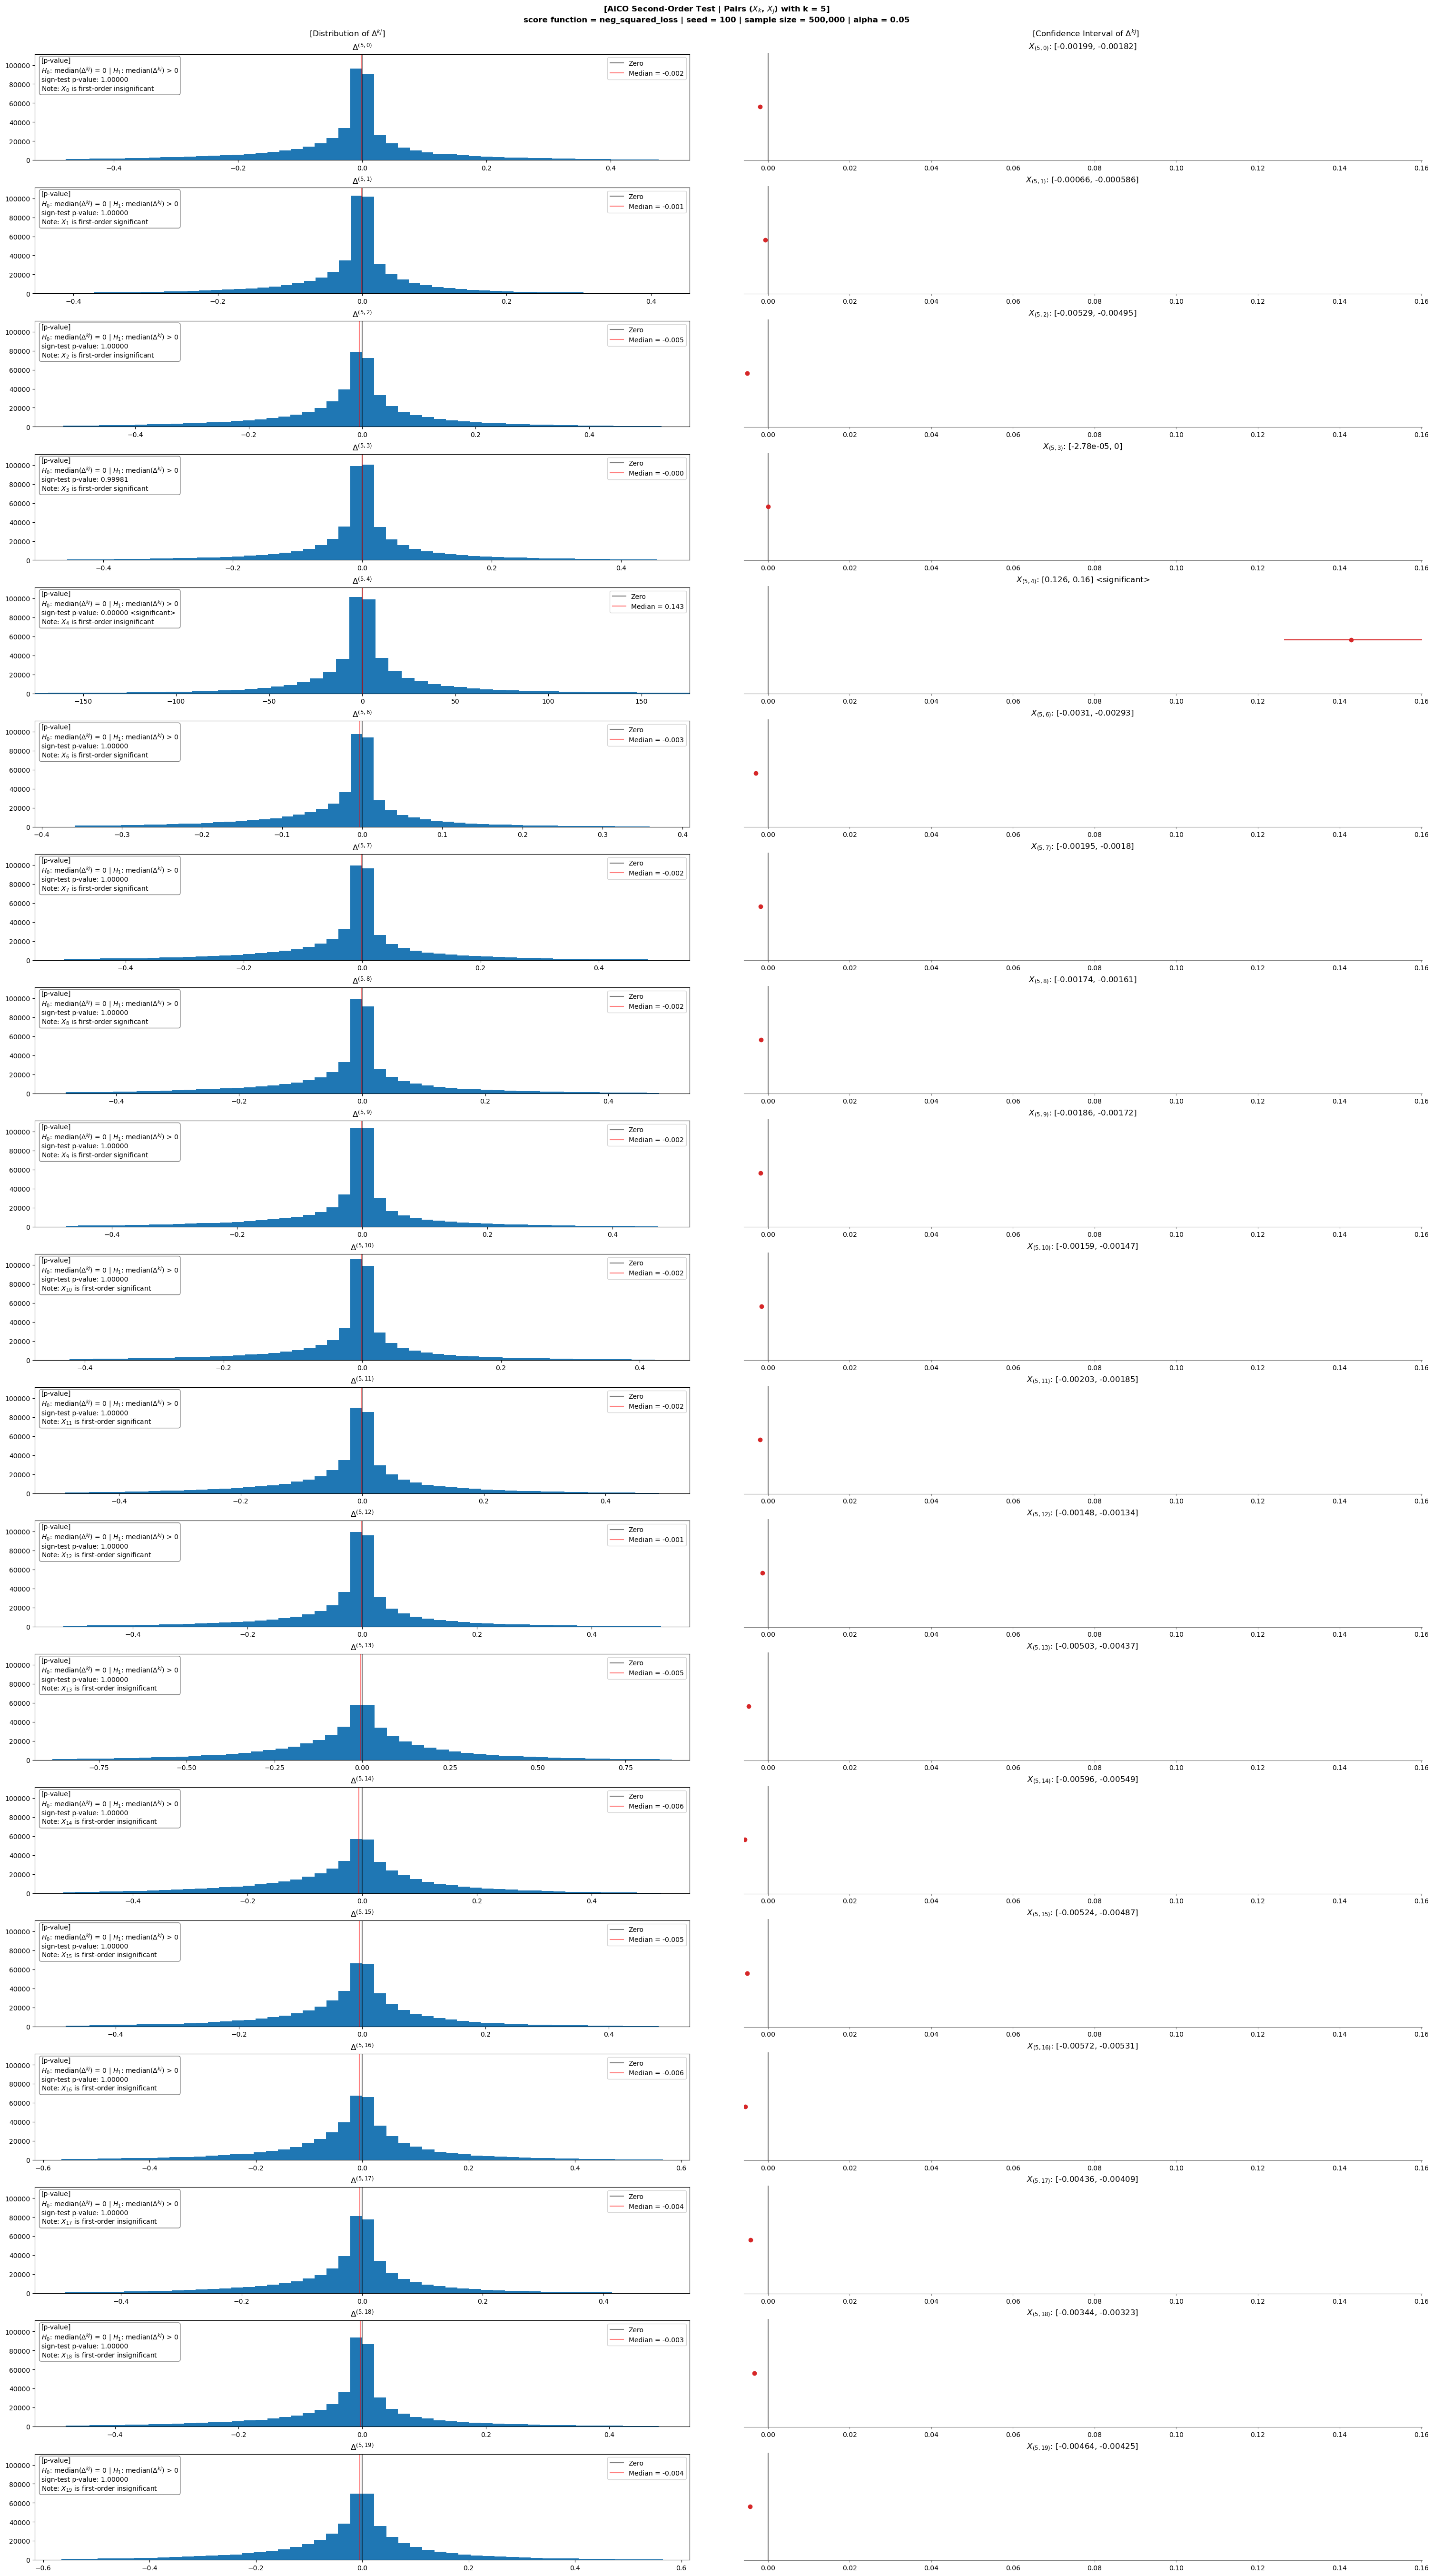

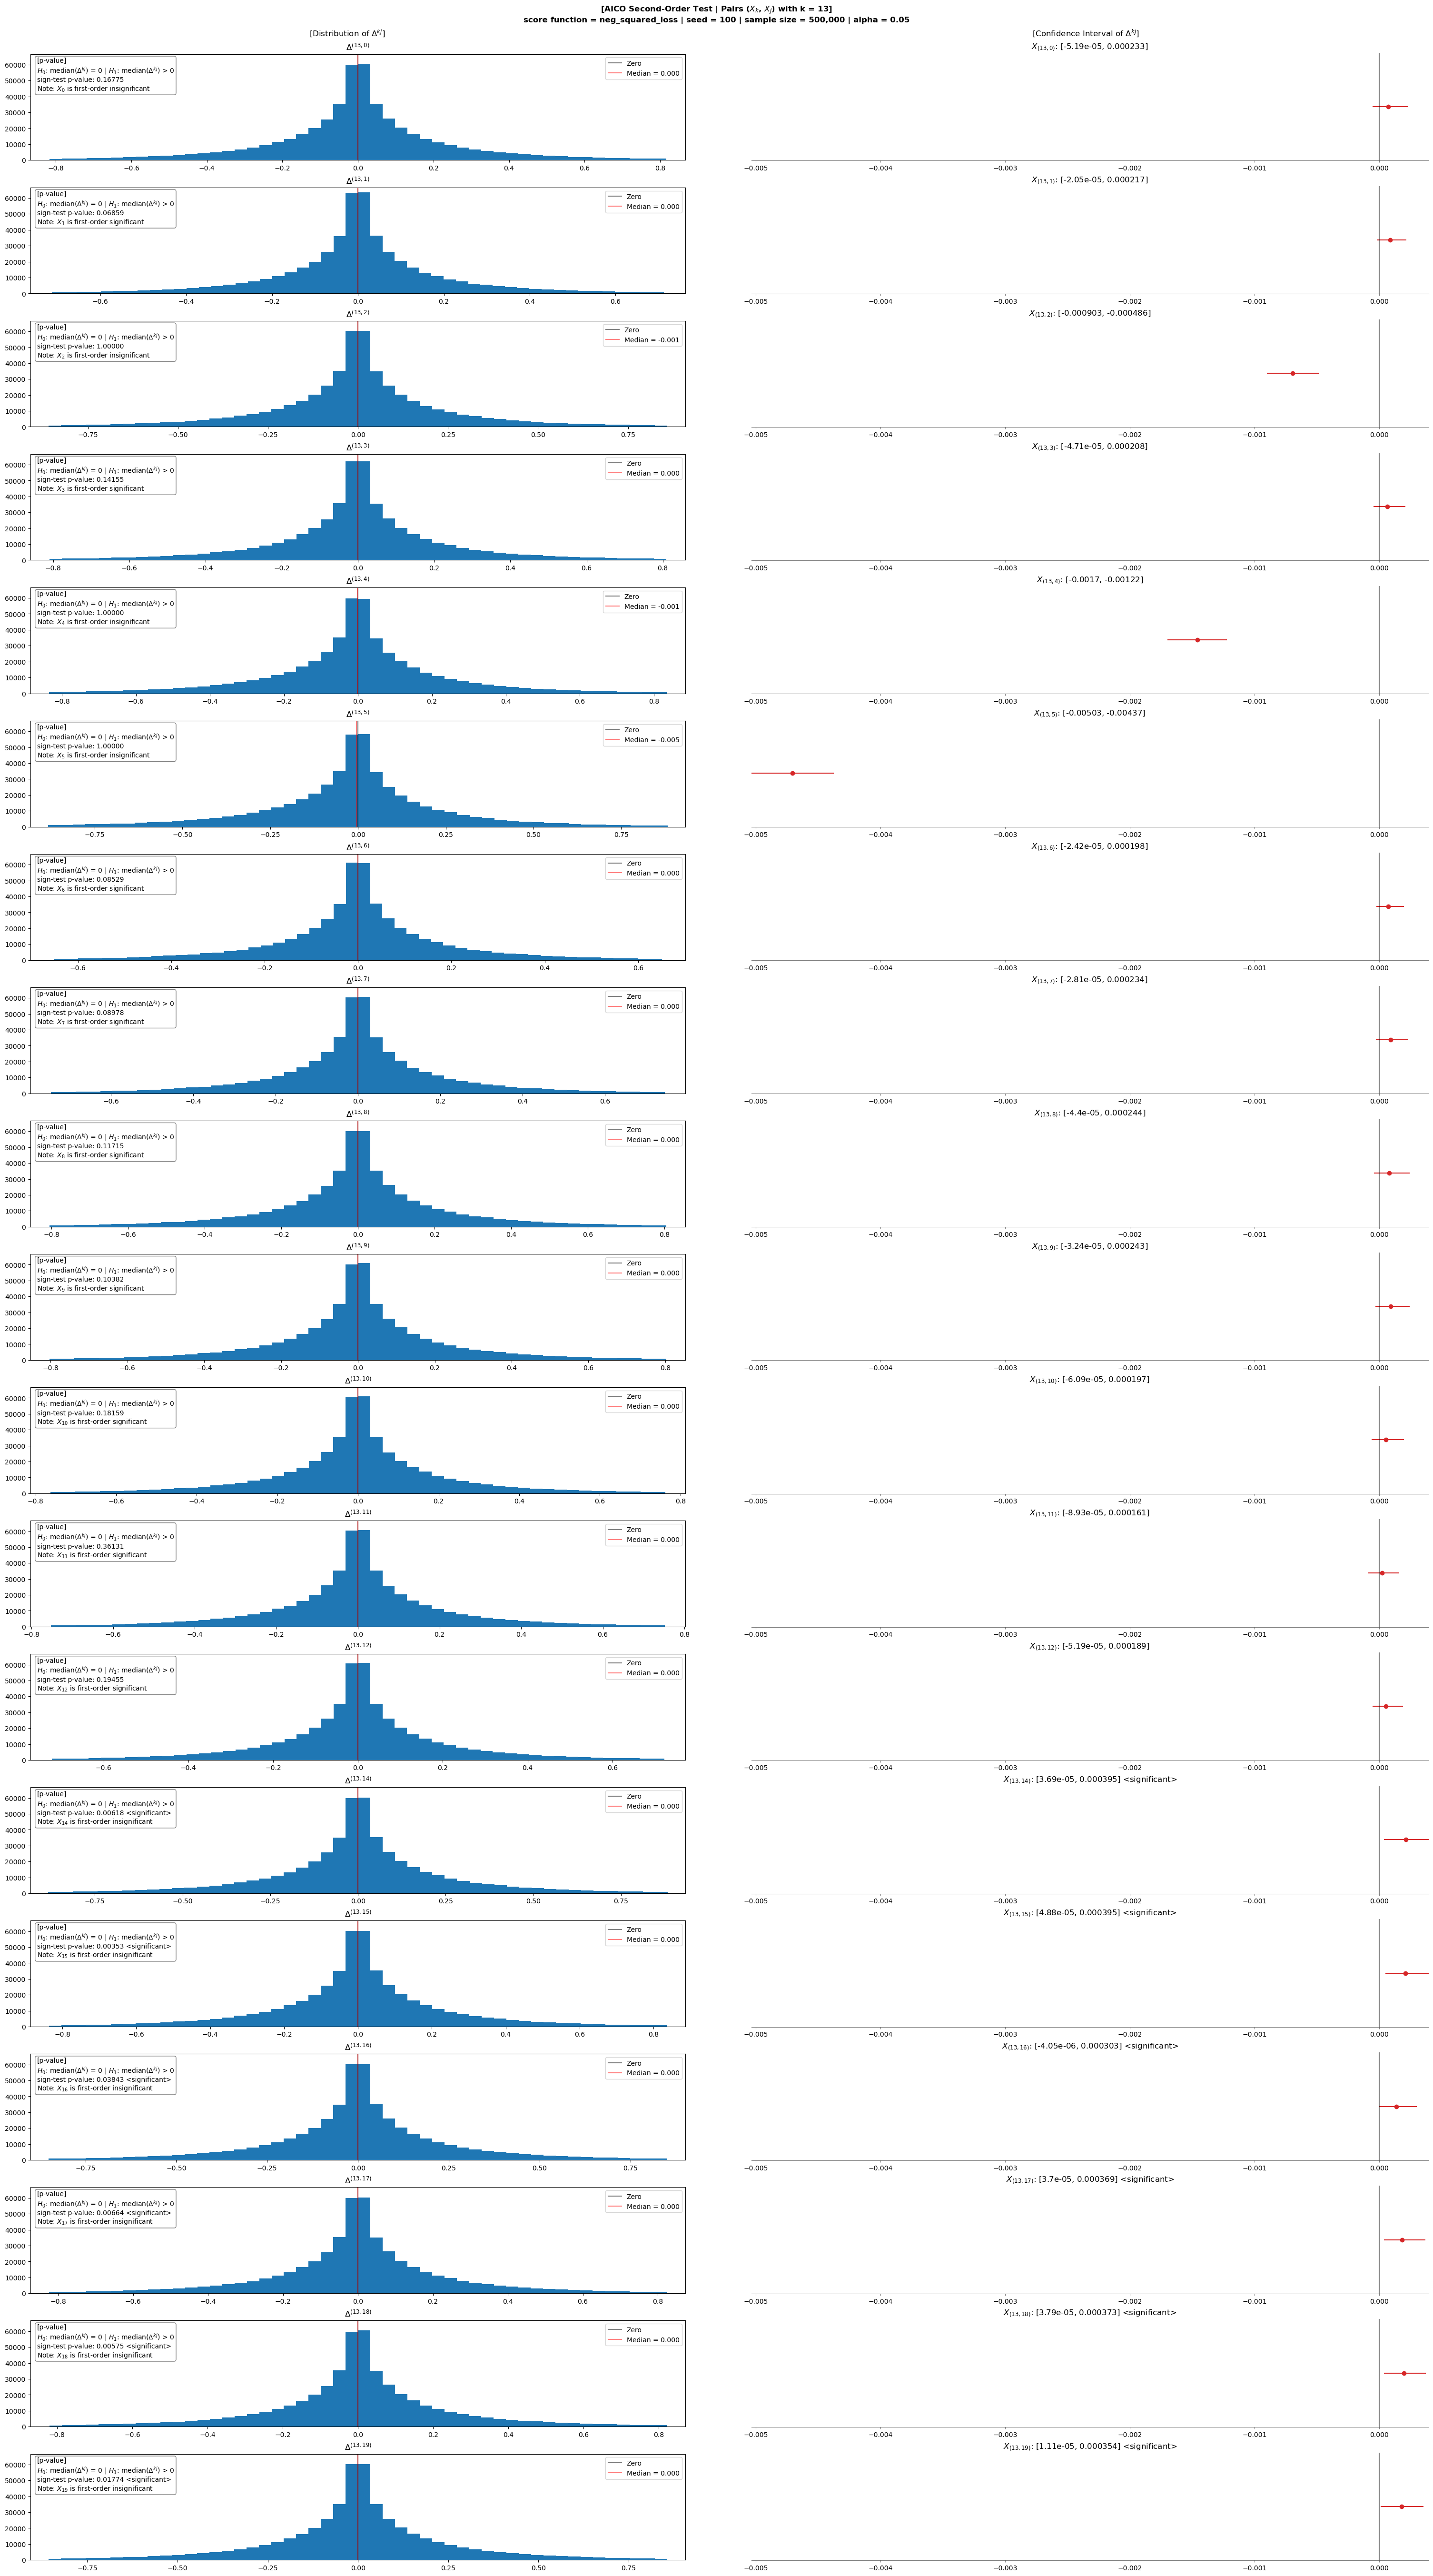

In [5]:
all_second_order_results = []
for seed in [100]: #range(100, 1001, 100):
    n_train, n_test = 1000000, 500000
    x_train, x_test, y_train, y_test = sim_demo_model(n_train, n_test, seed=seed)

    model = keras.saving.load_model(f'Models/seed_{seed}.h5')
    intercept = np.mean(x_train, axis=0)

    second_order_results = second_order_test(x=x_test,
                                            y=y_test,
                                            model=model,
                                            score_func=neg_squared_loss,
                                            intercept=intercept,
                                            k_list=[1, 2, 3, 4, 5, 13],
                                            first_order_result=all_first_order_results,
                                            alpha=0.05,
                                            seed=seed,
                                            visualize=True,
                                            pred_params=dict(batch_size=n_test,
                                                             verbose=0))
    all_second_order_results.append(second_order_results)

all_second_order_results = pd.concat(all_second_order_results)

## Table

In [6]:
print(all_second_order_results)

    seed   k   j  j_first_order_sig        score_func  sample_size     median  \
0    100   1   0              False  neg_squared_loss       500000  18.870908   
1    100   1   2              False  neg_squared_loss       500000  18.076550   
2    100   1   3               True  neg_squared_loss       500000  19.326299   
3    100   1   4              False  neg_squared_loss       500000  18.882901   
4    100   1   5              False  neg_squared_loss       500000  18.868451   
..   ...  ..  ..                ...               ...          ...        ...   
14   100  13  15              False  neg_squared_loss       500000   0.000211   
15   100  13  16              False  neg_squared_loss       500000   0.000136   
16   100  13  17              False  neg_squared_loss       500000   0.000184   
17   100  13  18              False  neg_squared_loss       500000   0.000197   
18   100  13  19              False  neg_squared_loss       500000   0.000178   

    p_sign_test  alpha     